[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Lecture_Code/Code_07_1_Model_Evaluation.ipynb)

Install and load libraries

In [1]:
%pip install pydataset
from pydataset import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 48.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939414 sha256=70a0c8853765998a90e3ebf49bbcb45927a432bd37d1290e615cc28e5fad275a
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


Get the professor salary data set. Dicsipline variable is A for theoretical discipline, and B for applied discipline.


In [2]:
prof = pd.DataFrame(data("Salaries"))
prof.head(10)


,rank,discipline,yrs.since.phd,yrs.service,sex,salary
1,Prof,B,19,18,Male,139750
2,Prof,B,20,16,Male,173200
3,AsstProf,B,4,3,Male,79750
4,Prof,B,45,39,Male,115000
5,Prof,B,40,41,Male,141500
6,AssocProf,B,6,6,Male,97000
7,Prof,B,30,23,Male,175000
8,Prof,B,45,45,Male,147765
9,Prof,B,21,20,Male,119250
10,Prof,B,18,18,Female,129000


Exploratory data analysis

(array([ 33.,  78., 103.,  64.,  50.,  37.,  20.,   9.,   2.,   1.]),
 array([ 57800. ,  75174.5,  92549. , 109923.5, 127298. , 144672.5,
        162047. , 179421.5, 196796. , 214170.5, 231545. ]),
 <BarContainer object of 10 artists>)

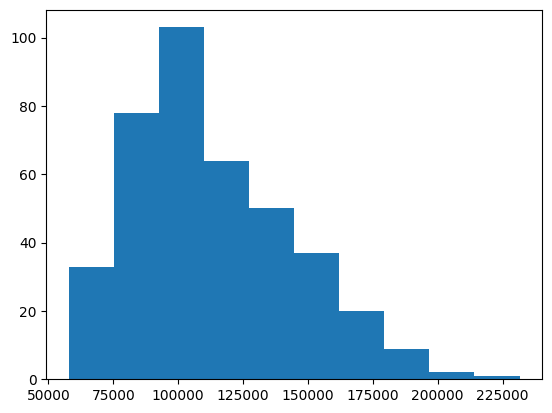

In [3]:
plt.hist(prof.salary)

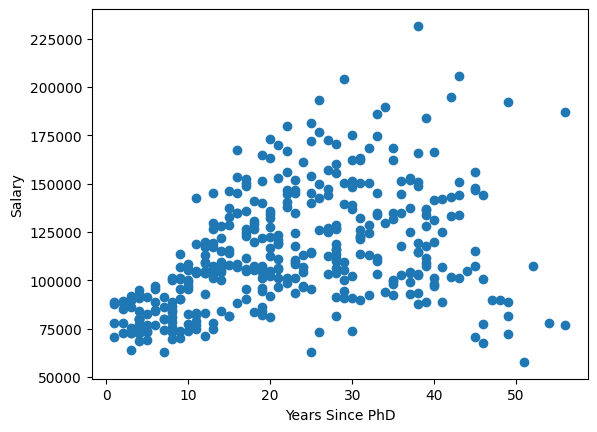

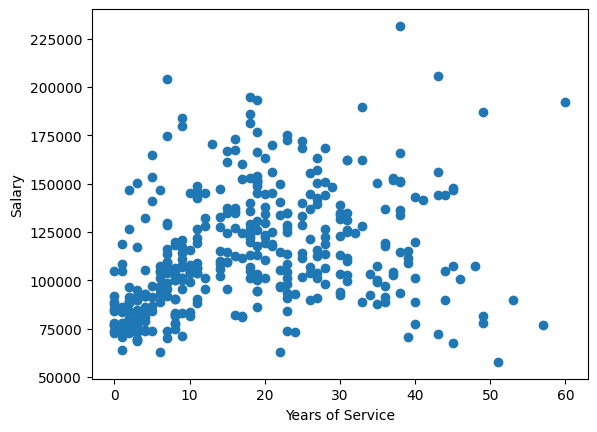

In [4]:
plt.scatter(prof["yrs.since.phd"],prof.salary)
plt.xlabel("Years Since PhD")
plt.ylabel("Salary")
plt.show()

plt.scatter(prof["yrs.service"],prof.salary)
plt.xlabel("Years of Service")
plt.ylabel("Salary")
plt.show()

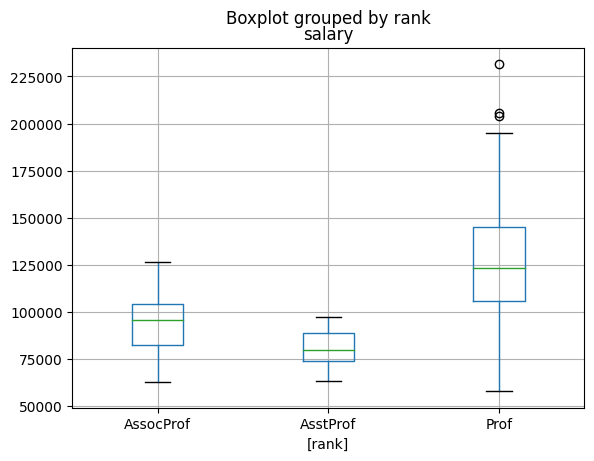

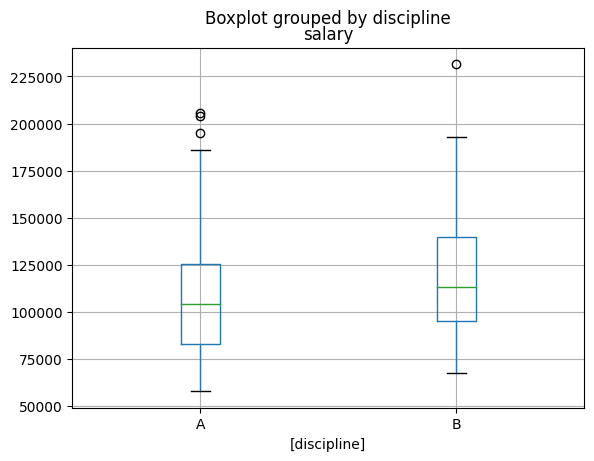

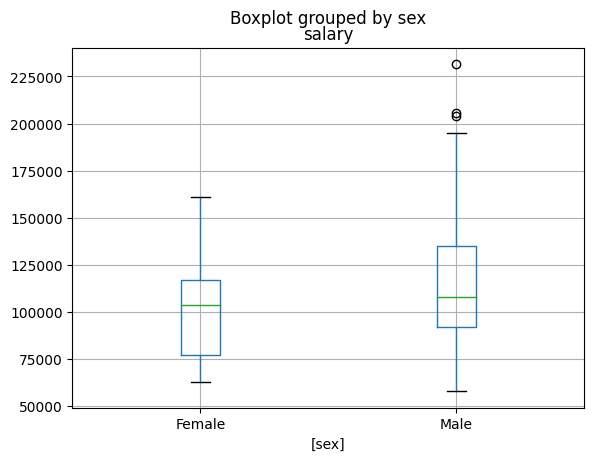

In [5]:
prof[["rank","salary"]].boxplot(by="rank")
plt.show()

prof[["discipline","salary"]].boxplot(by="discipline")
plt.show()

prof[["sex","salary"]].boxplot(by="sex")
plt.show()

Build a regression model

In [6]:
X = pd.get_dummies(prof[["yrs.service","yrs.since.phd","discipline","sex","rank"]],drop_first = True)
y = prof.salary
from sklearn.linear_model import LinearRegression

reg_prep = LinearRegression()
mod_reg = reg_prep.fit(X,y)

print('intercept:', mod_reg.intercept_)
dict(zip(X.columns,mod_reg.coef_))

intercept: 78862.82025652178


{'yrs.service': -489.51571521045526,
 'yrs.since.phd': 535.0582819582953,
 'discipline_B': 14417.625570546845,
 'sex_Male': 4783.49283668669,
 'rank_AsstProf': -12907.587899793774,
 'rank_Prof': 32158.41077170398}

Get predictions of the data and compare against the truth

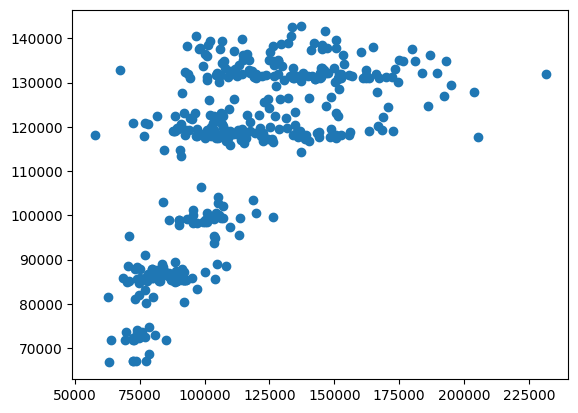

In [7]:
# using predict with the original X's will give in-sample predictions
in_sample_reg = mod_reg.predict(X)
plt.scatter(y,in_sample_reg)
plt.show()

Use MSE and R^2 to give some measure of goodness of fit.

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# the mean_squared_error function has two argument, the truth and the
# predictions, to compare. Same with the r2_score
rmse_reg_in = np.sqrt(mean_squared_error(y,in_sample_reg))
r2_reg_in = r2_score(y,in_sample_reg)
print(rmse_reg_in)
print(r2_reg_in)

22339.059642372675
0.4546766222907247


Build a decision tree and view in-sample predictions

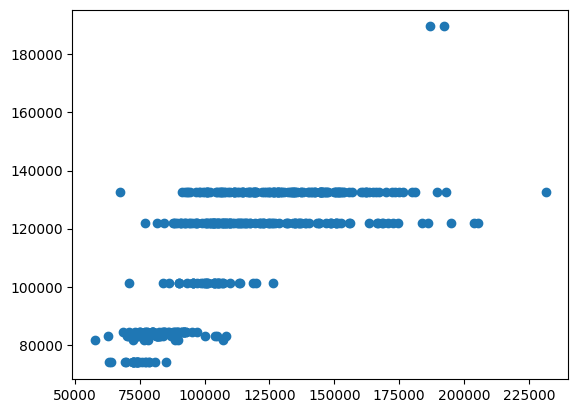

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

X_tree = pd.get_dummies(prof[["yrs.service","yrs.since.phd","discipline","sex","rank"]])

tree_prep = DecisionTreeRegressor(max_depth = 3)
mod_tree = tree_prep.fit(X_tree,y)

in_sample_tree = mod_tree.predict(X_tree)
plt.scatter(y,in_sample_tree)
plt.show()

Calculate MSE and R^2 for the regression tree

In [10]:
rmse_tree_in = np.sqrt(mean_squared_error(y,in_sample_tree))
r2_tree_in = r2_score(y,in_sample_tree)

print(rmse_tree_in)
print(r2_tree_in)

21519.367223530277
0.49396176266682934


Split the data into a training and test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
# check to make sure nothing funky happened in the split
print(y_train.mean())
print(y_test.mean())


113571.85198555957
114017.175


Fit the model only on the training set and calculate MSE and R^2 on the test set

In [12]:
reg_prep2 = LinearRegression()
mod_reg2 = reg_prep2.fit(X_train,y_train)

out_sample_reg = mod_reg2.predict(X_test)

rmse_reg_out = np.sqrt(mean_squared_error(y_test,out_sample_reg))
r2_reg_out = r2_score(y_test,out_sample_reg)
print(rmse_reg_out)
print(r2_reg_out)

23641.207104104218
0.45219131452335937


Do the same for the regression tree

In [13]:
X_train_tree, X_test_tree, y_train, y_test = train_test_split(X_tree, y, test_size=0.3, random_state=1234)

tree_prep2 = DecisionTreeRegressor(max_depth = 3)
mod_tree2 = tree_prep2.fit(X_train_tree,y_train)

out_sample_tree = mod_tree2.predict(X_test_tree)

rmse_tree_out = np.sqrt(mean_squared_error(y_test,out_sample_tree))
r2_tree_out = r2_score(y_test,out_sample_tree)
print(rmse_tree_out)
print(r2_tree_out)

26498.07374767792
0.3117943599247328


Collect all the results

In [14]:
vals = [rmse_reg_in,r2_reg_in,rmse_tree_in,r2_tree_in,
        rmse_reg_out,r2_reg_out,rmse_tree_out,r2_tree_out]
valnames = ["MSE Regression In-Sample","R^2 Regression In-Sample",
            "MSE Tree In-Sample","R^2 Tree In-Sample",
            "MSE Regression Out-Of-Sample","R^2 Regression Out-Of-Sample",
            "MSE Tree Out-of-Sample","R^2 Tree Out-of-Sample"]

dict(zip(valnames,vals))

{'MSE Regression In-Sample': 22339.059642372675,
 'R^2 Regression In-Sample': 0.4546766222907247,
 'MSE Tree In-Sample': 21519.367223530277,
 'R^2 Tree In-Sample': 0.49396176266682934,
 'MSE Regression Out-Of-Sample': 23641.207104104218,
 'R^2 Regression Out-Of-Sample': 0.45219131452335937,
 'MSE Tree Out-of-Sample': 26498.07374767792,
 'R^2 Tree Out-of-Sample': 0.3117943599247328}